<a href="https://colab.research.google.com/github/VSettipalli/CODSOFT/blob/main/Movie_Rating_Prediction_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

Inserting the Dataset

In [61]:
df = pd.read_csv('/content/IMDb Movies India.csv', encoding='ISO-8859-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [62]:
df.info

<bound method DataFrame.info of                                      Name    Year Duration            Genre  \
0                                             NaN      NaN            Drama   
1      #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                             #Homecoming  (2021)   90 min   Drama, Musical   
3                                 #Yaaram  (2019)  110 min  Comedy, Romance   
4                       ...And Once Again  (2010)  105 min            Drama   
...                                   ...     ...      ...              ...   
15504                 Zulm Ko Jala Doonga  (1988)      NaN           Action   
15505                               Zulmi  (1999)  129 min    Action, Drama   
15506                           Zulmi Raj  (2005)      NaN           Action   
15507                       Zulmi Shikari  (1988)      NaN           Action   
15508                        Zulm-O-Sitam  (1998)  130 min    Action, Drama   

       Rating Votes            Director           Actor 1             Actor 2  \
0         NaN   NaN       J.S. Randhawa          Manmauji              Birbal   
1         7.0     8       Gaurav Bakshi      Rasika Dugal      Vivek Ghamande   
2         NaN   NaN  Soumyajit Majumdar      Sayani Gupta   Plabita Borthakur   
3         4.4    35          Ovais Khan           Prateik          Ishita Raj   
4         NaN   NaN        Amol Palekar      Rajat Kapoor  Rituparna Sengupta   
...       ...   ...                 ...               ...                 ...   
15504     4.6    11       Mahendra Shah  Naseeruddin Shah       Sumeet Saigal   
15505     4.5   655          Kuku Kohli      Akshay Kumar      Twinkle Khanna   
15506     NaN   NaN          Kiran Thej   Sangeeta Tiwari                 NaN   
15507     NaN   NaN                 NaN               NaN                 NaN   
15508     6.2    20        K.C. Bokadia        Dharmendra          Jaya Prada   

               Actor 3  
0      Rajendra Bhatia  
1        Arvind Jangid  
2           Roy Angana  
3      Siddhant Kapoor  
4          Antara Mali  
...                ...  
15504    Suparna Anand  
15505      Aruna Irani  
15506              NaN  
15507              NaN  
15508      Arjun Sarja  

[15509 rows x 10 columns]>

In [63]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [64]:
df.dtypes

,0
Name,object
Year,object
Duration,object
Genre,object
Rating,float64
Votes,object
Director,object
Actor 1,object
Actor 2,object
Actor 3,object


In [65]:
df.shape

(15509, 10)

In [66]:
df.isna().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [67]:
df.dropna(subset=['Rating'], inplace=True)

In [68]:
df.isna().sum()

,0
Name,0
Year,0
Duration,2068
Genre,102
Rating,0
Votes,0
Director,5
Actor 1,125
Actor 2,200
Actor 3,292


In [69]:
df.dropna(subset=['Rating'], inplace=True)

In [70]:
df.isna().sum()

,0
Name,0
Year,0
Duration,2068
Genre,102
Rating,0
Votes,0
Director,5
Actor 1,125
Actor 2,200
Actor 3,292


In [71]:
df['Genre'].fillna('Unknown', inplace=True)

In [72]:
df.isna().sum()

,0
Name,0
Year,0
Duration,2068
Genre,0
Rating,0
Votes,0
Director,5
Actor 1,125
Actor 2,200
Actor 3,292


In [73]:
df.duplicated().sum()

np.int64(0)

In [74]:
df['Year'] = df['Year'].str.extract(r'(\d+)').astype(int)
df['Votes'] = df['Votes'].str.extract(r'(\d+)').astype(int)
df.dtypes

,0
Name,object
Year,int64
Duration,object
Genre,object
Rating,float64
Votes,int64
Director,object
Actor 1,object
Actor 2,object
Actor 3,object


In [75]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142 min,"Drama, Romance, War",7.4,1,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [76]:
plt.style.use('default')
numerical_columns = ['Year', 'Votes']


Creating box plots before removing outliers

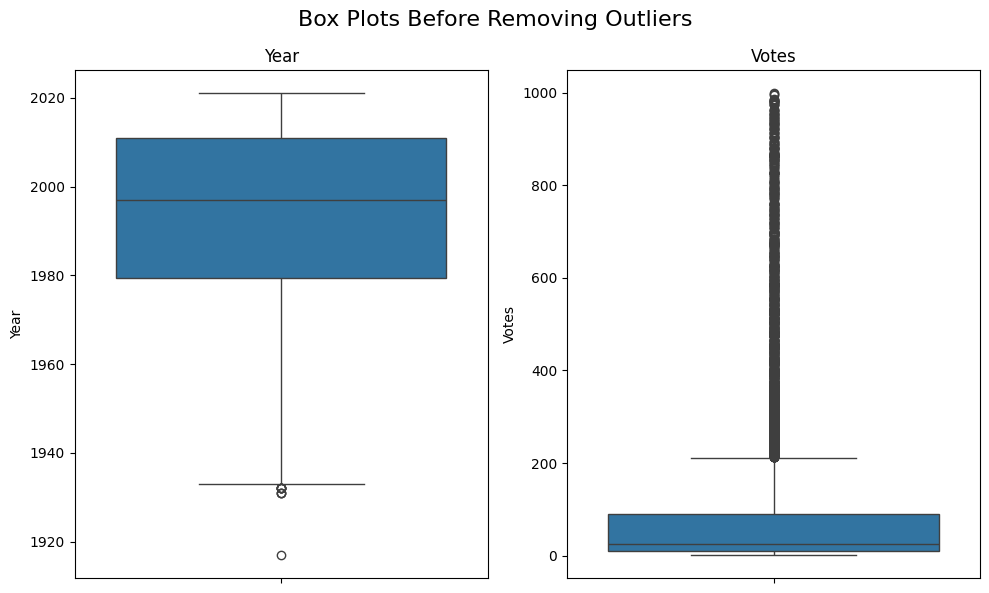

Number of rows with outliers before removal: 818


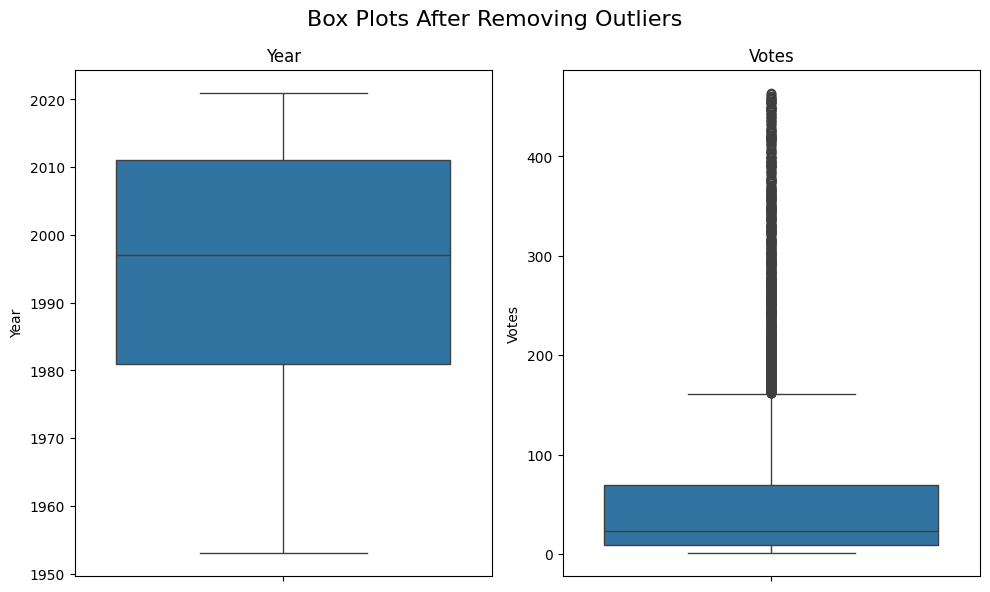

Number of rows after removing outliers: 7101


In [77]:
# Explicitly convert columns to numeric to avoid TypeErrors
df['Year'] = df['Year'].astype(str).str.extract(r'(\d+)').astype(float)
df['Votes'] = df['Votes'].astype(str).str.replace(',', '', regex=False).astype(float)

plt.figure(figsize=(10, 6))
plt.suptitle('Box Plots Before Removing Outliers', fontsize=16)

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(y=df[column]) # Use seaborn boxplot
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

z_scores = pd.DataFrame()
for column in numerical_columns:
    z_scores[column] = (df[column] - df[column].mean()) / df[column].std()

z_score_threshold = 2

outliners = z_scores[(z_scores.abs() > z_score_threshold).any(axis=1)]

print("Number of rows with outliers before removal:", len(outliners))

#Remove outliers and create a new DataFrame
df = df[~((z_scores.abs() > z_score_threshold).any(axis=1))]

# Check if the DataFrame is empty after removing outliers
if df.empty:
    print("DataFrame is empty after removing outliers. Consider adjusting the outlier removal threshold.")
else:
    #Create box plots after removing outliers
    plt.figure(figsize=(10, 6))
    plt.suptitle('Box Plots After Removing Outliers', fontsize=16)

    # Filter numerical columns that still exist in the DataFrame
    remaining_numerical_columns = [col for col in numerical_columns if col in df.columns]

    for i, column in enumerate(remaining_numerical_columns, 1):
        plt.subplot(1, len(remaining_numerical_columns), i) # Adjust subplot layout based on remaining columns
        sns.boxplot(y=df[column]) # Use seaborn boxplot
        plt.title(f'{column}')

    plt.tight_layout()
    plt.show()

#Display the number of rows after removing outliers
print("Number of rows after removing outliers:", len(df))

Rating Analysis

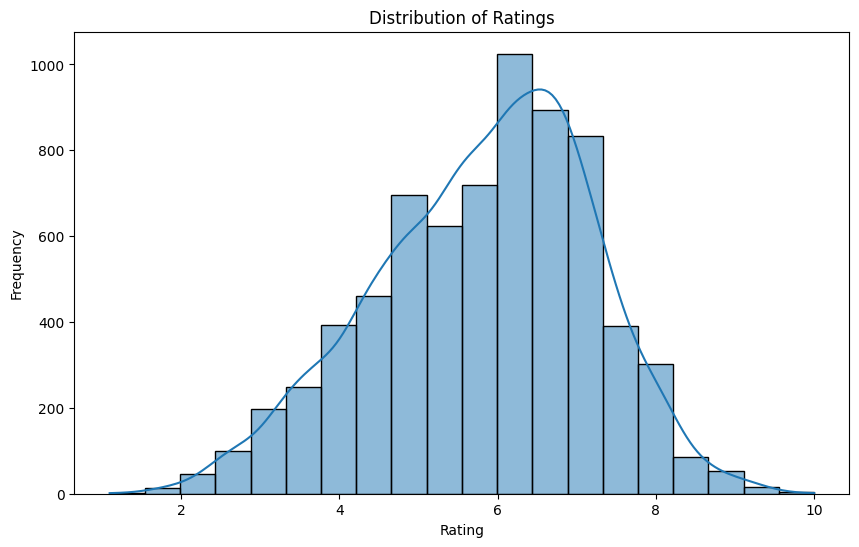

In [78]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

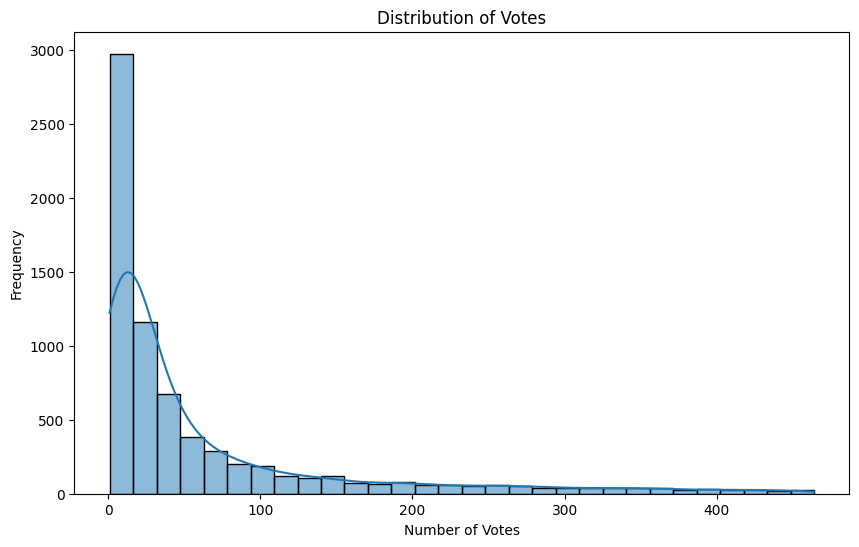

In [79]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x= 'Votes', bins=30, kde=True)
plt.title('Distribution of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.show

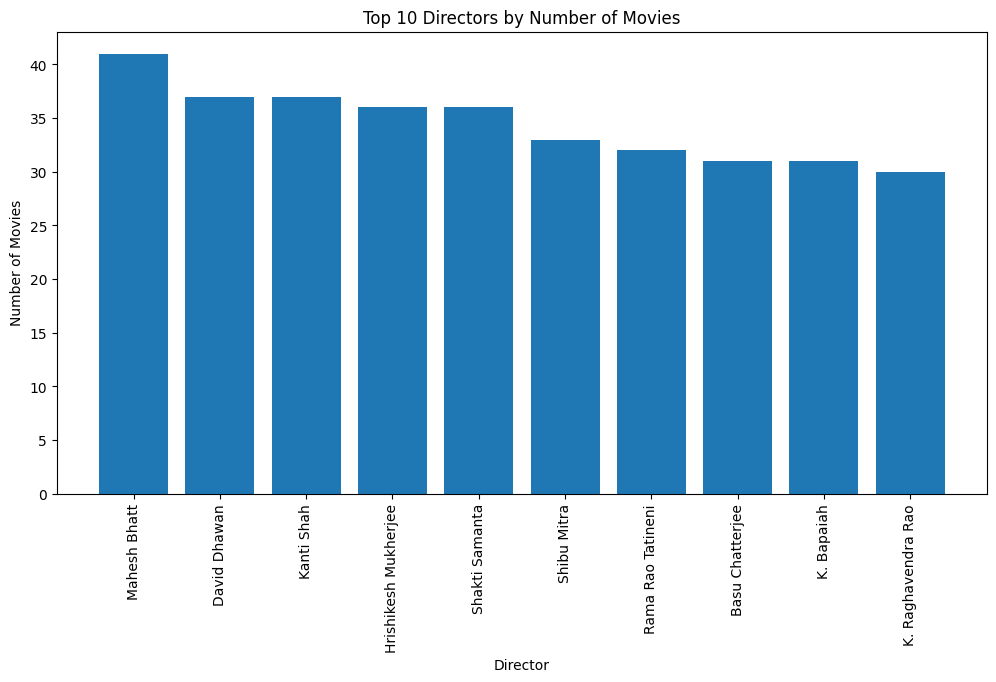

In [80]:
director_counts = df['Director'].value_counts()
top_10_directors = director_counts.head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_10_directors.index, height=top_10_directors.values) # Removed trailing comma and used height=
plt.title('Top 10 Directors by Number of Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()

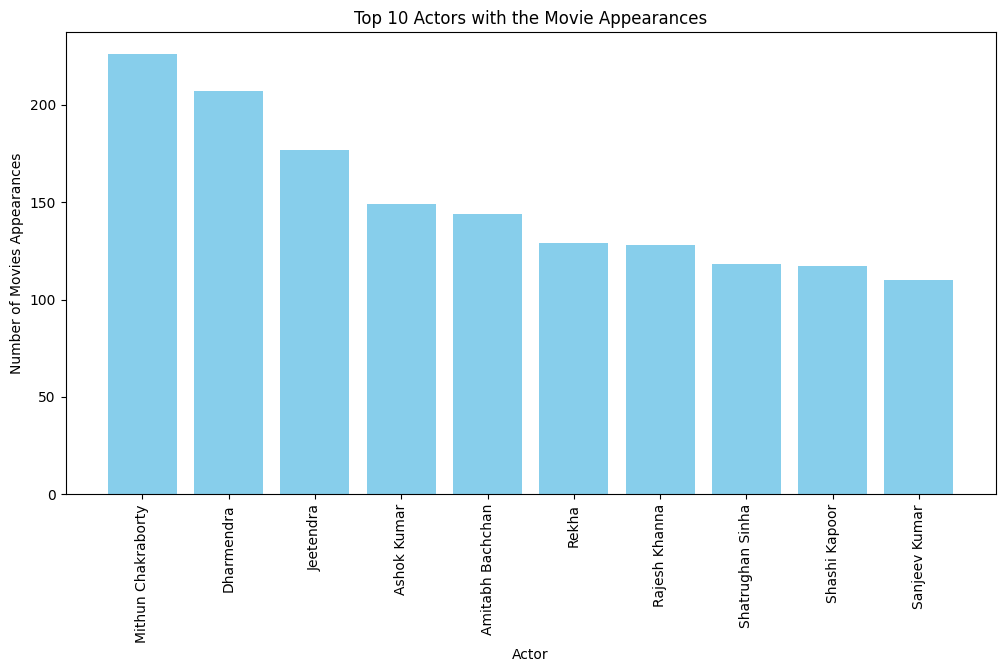

In [81]:
 actor_counts = df[['Actor 1', 'Actor 2', 'Actor 3']].stack().value_counts()
 top_10_actors = actor_counts.head(10)
 plt.figure(figsize=(12, 6))
 plt.bar(top_10_actors.index, top_10_actors.values, color='skyblue')
 plt.title('Top 10 Actors with the Movie Appearances')
 plt.xlabel('Actor')
 plt.ylabel('Number of Movies Appearances')
 plt.xticks(rotation=90)
 plt.show()

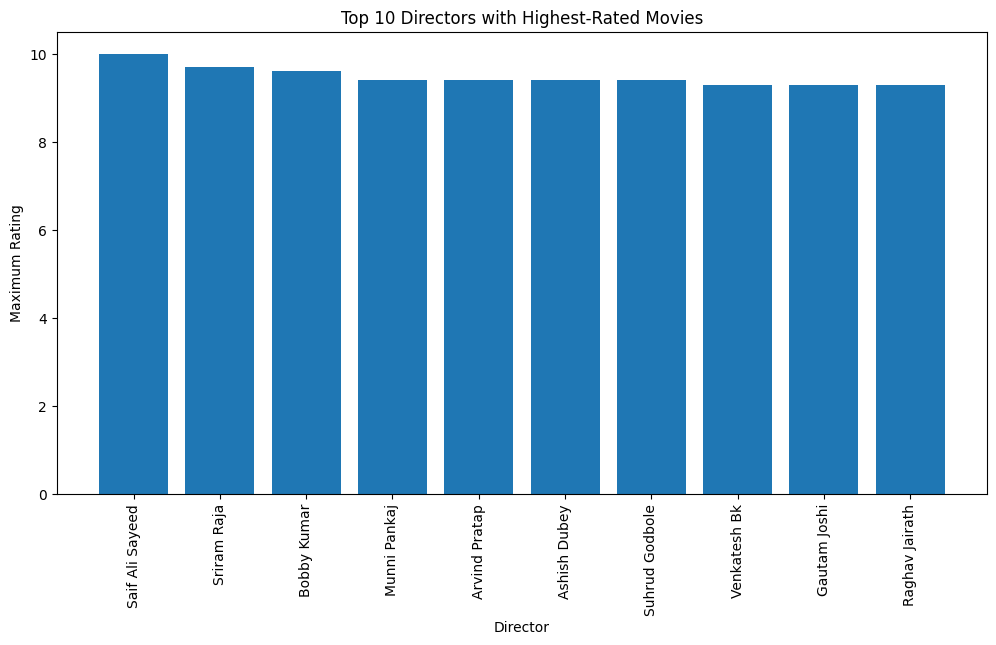

In [82]:
directors_max_rating = df.groupby('Director')['Rating'].max()
top_10_directors_max_rating = directors_max_rating.sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_10_directors_max_rating.index, top_10_directors_max_rating.values)
plt.title('Top 10 Directors with Highest-Rated Movies')
plt.xlabel('Director')
plt.ylabel('Maximum Rating')
plt.xticks(rotation=90)
plt.show()

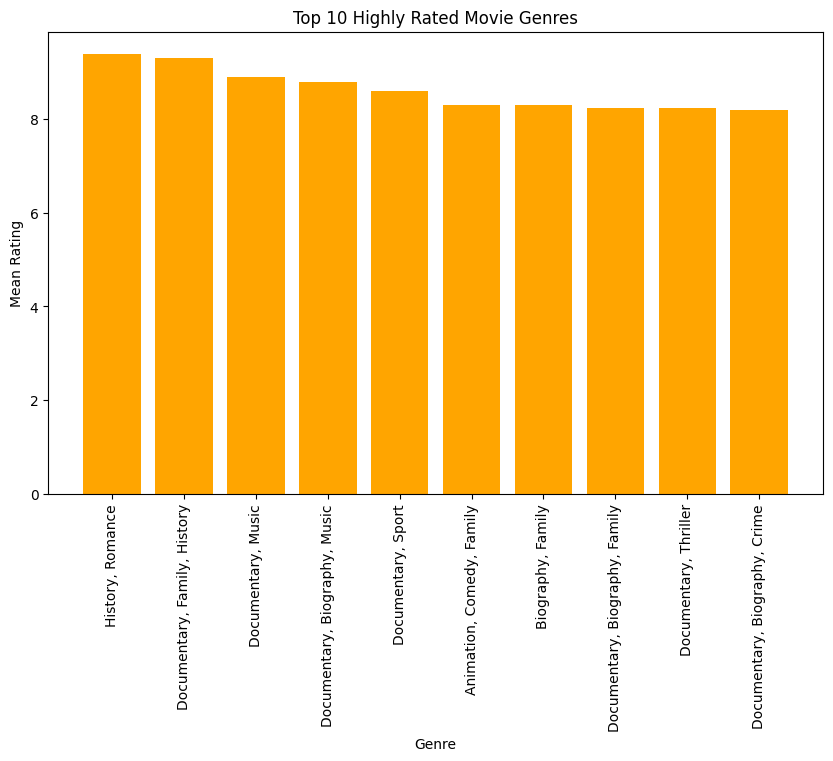

In [83]:
genre_mean_rating = df.groupby('Genre')['Rating'].mean()
top_10_genres_mean_rating = genre_mean_rating.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_10_genres_mean_rating.index, top_10_genres_mean_rating.values, color='orange')
plt.title('Top 10 Highly Rated Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Mean Rating')
plt.xticks(rotation=90)
plt.show()

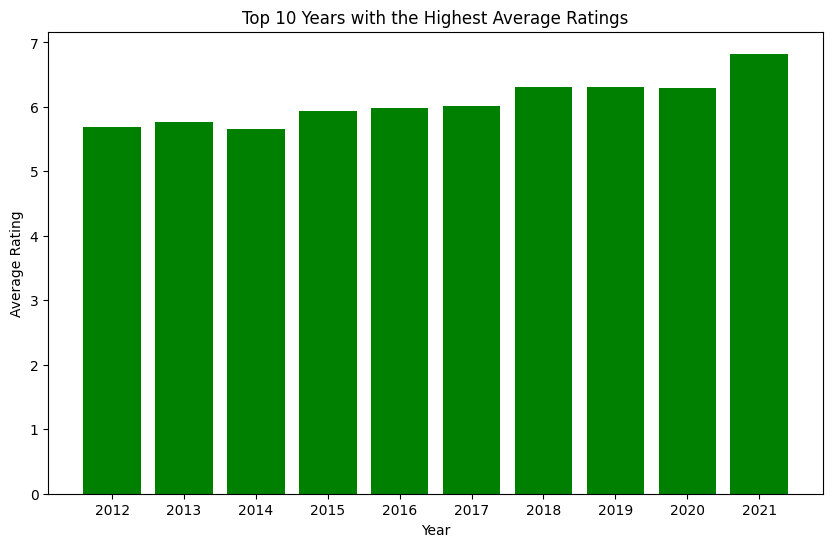

In [84]:
recent_years = df[df['Year'] >= (max(df['Year']) - 19)]
average_ratings = recent_years.groupby('Year')['Rating'].mean().reset_index()
top_10_years = average_ratings.nlargest(10, 'Rating')
plt.figure(figsize=(10, 6))
plt.bar(top_10_years['Year'], top_10_years['Rating'], color='green')
plt.title('Top 10 Years with the Highest Average Ratings')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.xticks(top_10_years['Year'])
plt.show()

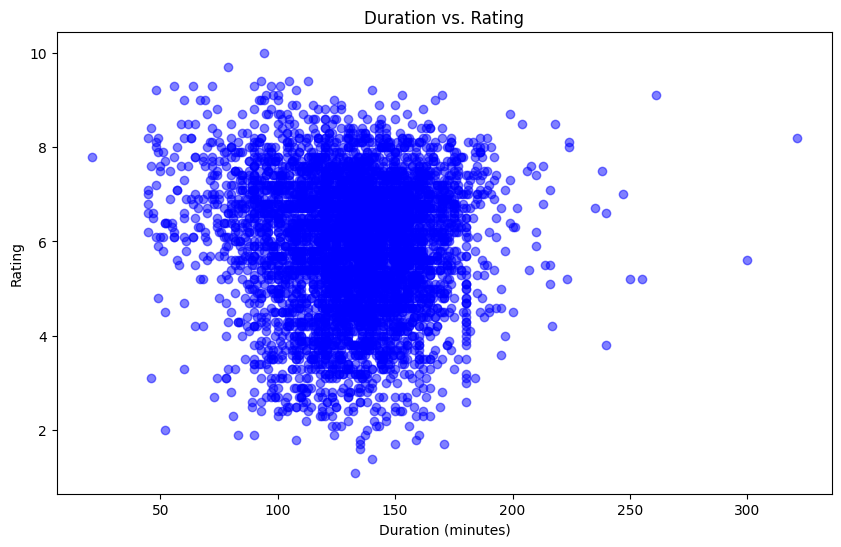

In [85]:
df['Duration'] = df['Duration'].astype(str).str.replace(' min', '', regex=False)
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')
df.dropna(subset=['Duration', 'Rating'], inplace=True)

plt.figure(figsize=(10, 6))
plt.scatter(df['Duration'], df['Rating'], alpha=0.5, color='blue')
plt.title('Duration vs. Rating')
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating')
plt.show()

Calculate the correlation matrix and create a heatmap

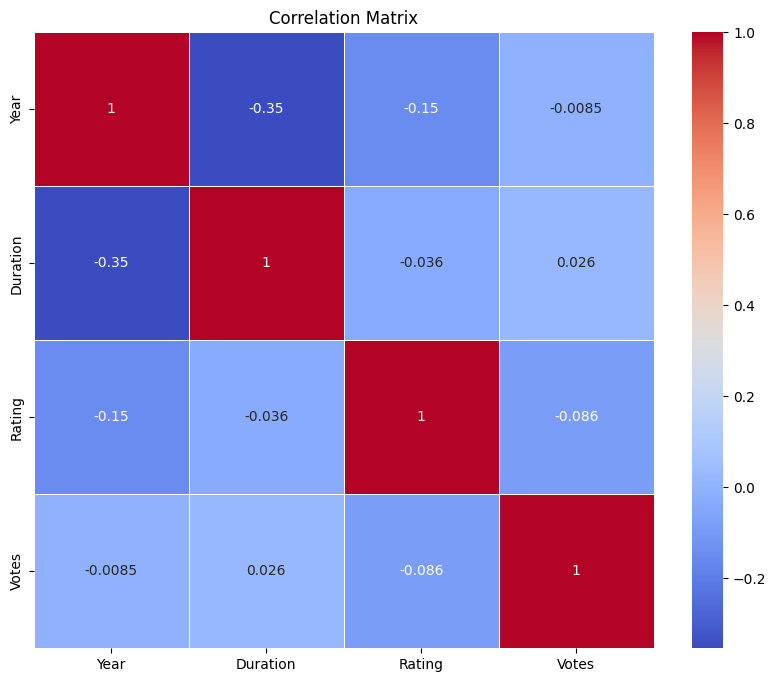

In [86]:
# Exclude non-numeric columns before calculating correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

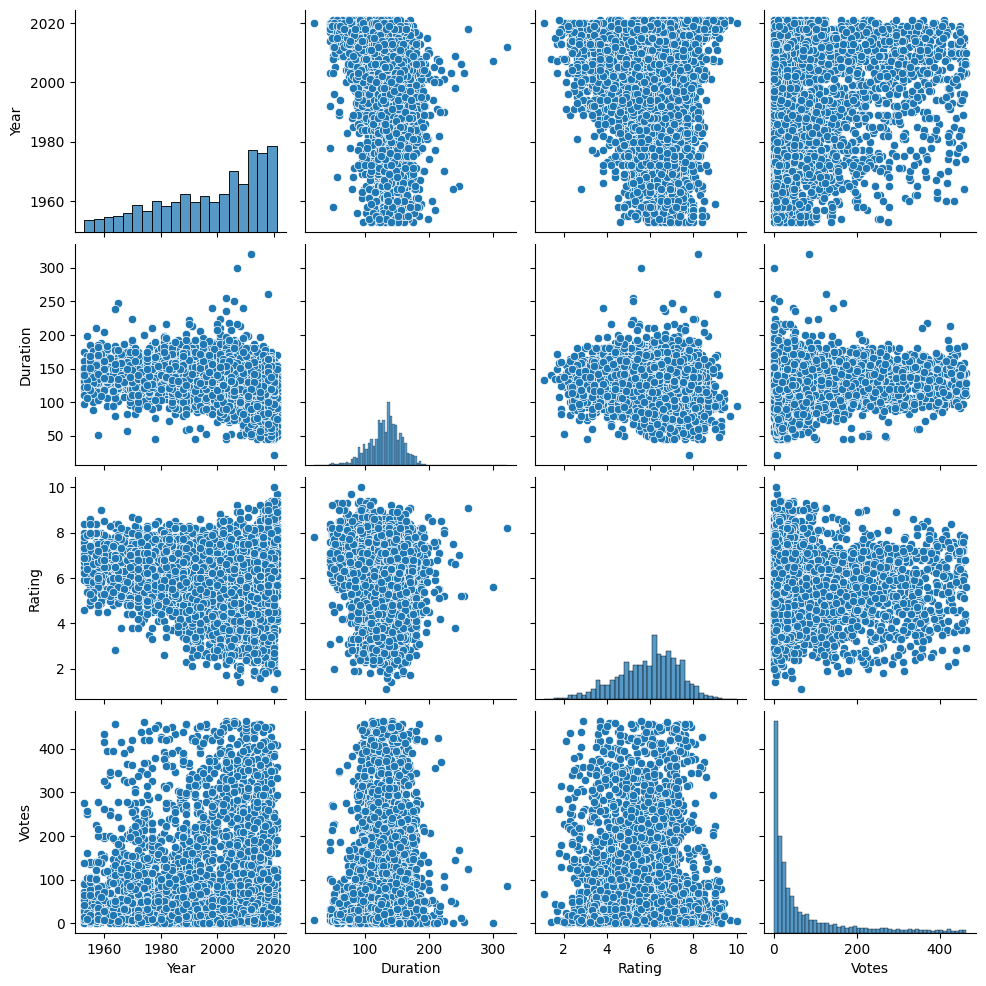

In [87]:
# Select the numerical variable for the pair plot
numerical_columns = df.select_dtypes(include=['number'])
sns.pairplot(numerical_columns)
plt.show()

In [88]:
x = df.drop('Rating', axis=1)
y = df['Rating']
x.head()

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019.0,110.0,"Comedy, Romance",35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
6,...Yahaan,2005.0,142.0,"Drama, Romance, War",1.0,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012.0,82.0,"Horror, Mystery, Thriller",326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,2014.0,116.0,"Action, Crime, Thriller",11.0,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [89]:
x_numeric = x.select_dtypes(include=['float64', 'int64'])
x_numeric.corr()

,Year,Duration,Votes
Year,1.000000,-0.353681,-0.008484
Duration,-0.353681,1.000000,0.026124
Votes,-0.008484,0.026124,1.000000


In [90]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [91]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

#specify the categorical columns to be one-hot encoded
categorical_columns = ['Name', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

#Initialize the OneHotEncoder with sparse_output=False
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

#Fit and transform the categorical columns
x_categorical_encoded = ohe.fit_transform(x[categorical_columns])

#Retrieve feature names for the encoded columns
feature_names = []
for i, col in enumerate(categorical_columns):
    categories = ohe.categories_[i]
    for category in categories:
        feature_names.append(f"{col}_{category}")

#Create a Dataframe for the encoded features
x_categorical_encoded_df = pd.DataFrame(x_categorical_encoded, columns=feature_names, index=x.index)

# Concatenate the one-hot encoded features with the numerical features
x_numerical = x.select_dtypes(include=['float64', 'int64'])
x_processed = pd.concat([x_numerical, x_categorical_encoded_df], axis=1)


# Display the First few rows of the one-hot encoded Datframe
display(x_processed.head())

,Year,Duration,Votes,Name_#Gadhvi (He thought he was Gandhi),Name_#Yaaram,Name_'Ferry',Name_...Yahaan,Name_102 Not Out,Name_10ml LOVE,Name_12 O'Clock,...,Actor 3_Zareen Khan,Actor 3_Zarine Ali,Actor 3_Zayed Khan,Actor 3_Zeenat Aman,Actor 3_Zeeshan Khan,Actor 3_Zeishan Quadri,Actor 3_Zenobia Shroff,Actor 3_Zoya Hussain,Actor 3_Zulfi Sayed,Actor 3_nan
1,2019.0,109.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019.0,110.0,35.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2005.0,142.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2012.0,82.0,326.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2014.0,116.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
# Specify the numerical columns to be scaled
numerical_columns = ['Year', 'Duration', 'Votes']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical columns
x_processed[numerical_columns] = scaler.fit_transform(x_processed[numerical_columns])

# Display the scaled numerical columns
display(x_processed[numerical_columns].head())

,Year,Duration,Votes
1,0.970588,0.293333,0.015119
3,0.970588,0.296667,0.073434
6,0.764706,0.403333,0.000000
8,0.867647,0.203333,0.701944
9,0.897059,0.316667,0.021598


In [93]:
# Combine the Scaled columns and OneHotEncoded Columns
x_final = pd.concat([x_processed[numerical_columns], x_categorical_encoded_df], axis=1)
x_final.head()

,Year,Duration,Votes,Name_#Gadhvi (He thought he was Gandhi),Name_#Yaaram,Name_'Ferry',Name_...Yahaan,Name_102 Not Out,Name_10ml LOVE,Name_12 O'Clock,...,Actor 3_Zareen Khan,Actor 3_Zarine Ali,Actor 3_Zayed Khan,Actor 3_Zeenat Aman,Actor 3_Zeeshan Khan,Actor 3_Zeishan Quadri,Actor 3_Zenobia Shroff,Actor 3_Zoya Hussain,Actor 3_Zulfi Sayed,Actor 3_nan
1,0.970588,0.293333,0.015119,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.970588,0.296667,0.073434,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.764706,0.403333,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.867647,0.203333,0.701944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.897059,0.316667,0.021598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
# Instantiate StandardScaler
scaler = MinMaxScaler()

# Fit and transform the data
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

#Convert 'y_scaled' back to DataFrame
y = pd.DataFrame(y_scaled, columns=['Rating'], index=y.index)
display(y.head())

,Rating
1,0.662921
3,0.370787
6,0.707865
8,0.505618
9,0.325843


In [95]:
x_train, x_test, y_train, y_test = train_test_split(x_final, y, test_size=0.2, random_state=42)

In [96]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred_test = lr_model.predict(x_test)
y_pred_train = lr_model.predict(x_train)

In [97]:
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
print(f"Test Mean Squared Error (Test):", mse_test)
print("Test R-squared (Test):", r2_test)
print("Mean Squared Error (Train):", mse_train)
print("R-squared (Train):", r2_train)

Test Mean Squared Error (Test): 0.020069731041131904
Test R-squared (Test): 0.1927683466119945
Mean Squared Error (Train): 1.089001703781282e-30
R-squared (Train): 1.0


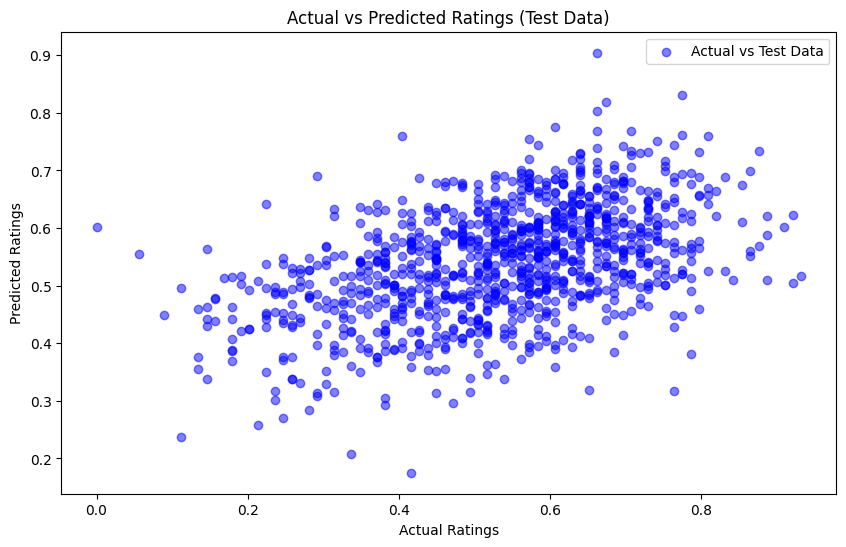

In [98]:
#Create  a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5, color='blue', label='Actual vs Test Data')
plt.title('Actual vs Predicted Ratings (Test Data)')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.legend()
plt.show()

Import The RandomForestRegressor from sklearn

In [99]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_test = rf_model.predict(x_test)
y_pred_train = rf_model.predict(x_train)

In [100]:
#Evaluate the model
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
print(f"Test Mean Squared Error (Test):", mse_test)
print("Test R-squared (Test):", r2_test)
print("Mean Squared Error (Train):", mse_train)
print("R-squared (Train):", r2_train)

Test Mean Squared Error (Test): 0.018233753123874322
Test R-squared (Test): 0.26661385488982325
Mean Squared Error (Train): 0.002349041490924621
R-squared (Train): 0.9022934603250916


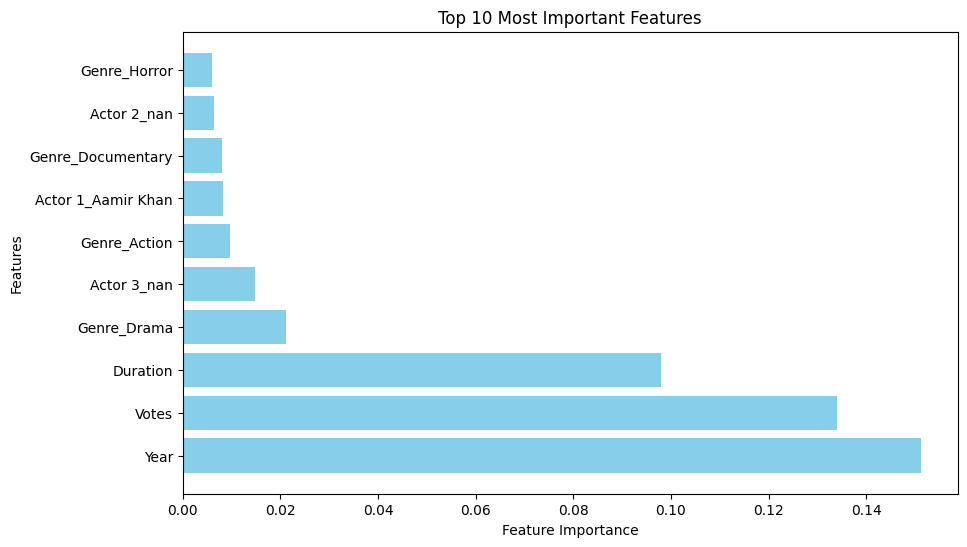

In [102]:
#Get Feature importances from the best model
feature_importances = rf_model.feature_importances_

# Get the column names of your feature data
feature_names = x_final.columns

top_indices = feature_importances.argsort()[-10:][::-1]
top_feature_names = feature_names[top_indices]
top_importances = feature_importances[top_indices]
plt.figure(figsize=(10, 6))
plt.barh(top_feature_names, top_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Most Important Features')
plt.show()